<a href="https://colab.research.google.com/github/jorgetapia-ml/sintomas_no_motores_vs_motores_parkinson/blob/develop/Avance4_Equipo11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Proyecto Integrador**
###Tecnológico de Monterrey
###Prof Grettel Barceló Alonso

## **Avance 4**

###**Modelos alternativos**

* Alejandra Ramírez Romano-A01793144
* Jorge Luis Tapia Peñaloza-A01793013
* Marco Antonio Pérez Castellanos-A01793473


# Documentación de modelos alternativos

Los algoritmos de agrupación son herramientas esenciales en áreas como el procesamiento de imágenes, la segmentación de clientes, el análisis genético, el análisis de documentos de texto, etc. Su propósito es organizar un conjunto de datos en grupos, de tal manera que los datos dentro de un mismo grupo sean más parecidos entre sí que con los de otros grupos. Normalmente, los conjuntos de datos en la vida real contienen tanto atributos numéricos como categóricos. A pesar de esto, la mayoría de los algoritmos de agrupación actuales están diseñados para trabajar con atributos que son exclusivamente numéricos o categóricos, como es el caso de los algoritmos k-means, k-modes, fuzzy k-modes, TGCA, COOLCAT, G-ANMI, etc. Cuando se trabaja con datos mixtos, estos algoritmos suelen recurrir a métodos de transformación para convertir un tipo de atributos en otro, y luego aplican los algoritmos de agrupación tradicionales. Sin embargo, este proceso de transformación puede causar la pérdida de información, lo que puede llevar a resultados de agrupación no satisfactorios. [1]

Se han realizado algunas investigaciones para abordar directamente los datos mixtos. Huang propuso un algoritmo llamado k-prototipos, que combina los métodos de k-means y k-modes para segmentar datos mixtos. Zheng y sus colegas desarrollaron un algoritmo evolutivo de k-prototipos (EKP) [2].

# El Algoritmo  K-Prototypes

Huang [2] presentó el conocido algoritmo de k-prototipos para agrupar datos mixtos. El objetivo de este algoritmo es dividir el conjunto de datos \( X \) en \( k \) grupos o clusters minimizando la función de coste, que se da de la siguiente manera:

$$
E(U, V) = \sum_{j=1}^{k} \sum_{i=1}^{n} u_{ij} d(x_i, V_j)
$$

donde \( V_j \) es el centro del cluster o prototipo de un cluster \( j \); \( u_{ij} \) (0 ≤ \( u_{ij} \) ≤ 1) es un elemento de la matriz de pertenencia \( U_{n \times k} \); y \( d(x_i, V_j) \) es la medida de distancia que se formula de la siguiente manera:

$$
d(x_i, V_j) = \sum_{l=1}^{m} d(x_{il}, v_{jl})
$$

El término \( d(x_{il}, v_{jl}) \) en la anterior ecuación está dada como sigue:

$$
d(x_{il}, v_{jl}) =
\begin{cases}
(x_{il} - v_{jl})^2 & \text{Si el atributo } l \text{th es numérico} \\
\beta \theta(x_{il}, v_{jl}) & \text{Si el atributo } l \text{th es categórico}
\end{cases}
$$

donde \( \theta(a, b) = 1 \) si los términos \( a \) y \( b \) tienen valores diferentes, \( \theta(a, b) = 0 \) si los términos \( a \) y \( b \) tienen el mismo valor, y \( \beta_j \) es el peso de los atributos categóricos en un grupo \( j \).

# El Proceso Del Algoritmo  K-Prototypes

**Entrada**: Conjunto de datos \( X \), el número de clusters \( k \), \( \beta_j \).

1. Se eligen \( k \) objetos de datos de manera aleatoria del conjunto de datos \( X \) como los centros de cluster iniciales o prototipos.
2. Para cada objeto de datos en \( X \), se le asigna al cluster cuyo prototipo es el más cercano a este objeto de datos de acuerdo con la Ecuación (2); después de cada asignación, se actualiza el centro del cluster o el prototipo del cluster correspondiente.
3. Se recalcula la similitud entre los objetos de datos y los prototipos después de que todos los objetos de datos hayan sido asignados. Si el prototipo más cercano de un objeto de datos pertenece a otro cluster, se retira este objeto de datos de su cluster actual y se reasigna al más cercano. Se actualizan los prototipos para estos dos clusters.
4. Se repite el Paso 3 hasta que ningún objeto de datos cambie sus clusters.

**Salida**: El resultado del clustering.

En Python, dentro de la librería de Scikit-Learn se encuentra k-prototypes, este algoritmo solo acepta valores floating-point para datos numéricos y valores integer para los datos categóricos[3].

# El Algoritmo Kmodes

El algoritmo k-modes es una técnica de agrupación diseñada específicamente para datos categóricos. Inicialmente, selecciona ‘k’ modas de manera aleatoria. Posteriormente, calcula la disimilitud, que es el número de discrepancias entre cada observación y las modas. Cada observación se asigna al clúster cuya moda es la más similar. Las modas de cada clúster se actualizan en función de la frecuencia de las observaciones dentro del clúster. Este proceso iterativo continúa hasta que las asignaciones de los clústeres se estabilizan. Esencialmente, el algoritmo k-modes es una adaptación del algoritmo k-means para datos categóricos, utilizando la moda y la disimilitud en lugar de la media y la distancia euclídea.[4]

# El Algoritmo de Clustering Jerarquico

El algoritmo de agrupamiento jerárquico es una metodología de aprendizaje automático no supervisado que se emplea para agrupar conjuntos de datos en clústeres basándose en su similitud. En su fase inicial, cada punto de datos se considera como un clúster individual. Posteriormente, el algoritmo calcula la disimilitud entre todos los pares de clústeres y fusiona los dos clústeres que presentan la mayor similitud. Este proceso se repite de manera iterativa hasta que todos los puntos de datos se agrupan en un solo clúster.

Los clústeres formados se representan en una estructura de árbol conocida como dendrograma, que permite visualizar la jerarquía de similitud entre los datos. Cada fusión de clústeres se representa como una bifurcación en el dendrograma, y la altura de la bifurcación corresponde a la disimilitud entre los clústeres fusionados.[5]

El algoritmo de agrupamiento jerárquico es particularmente útil cuando los patrones en los datos son desconocidos y se busca descubrir agrupaciones naturales.

# El Algoritmo DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de agrupación basado en densidad. Comienza con un punto de datos aleatorio, examina su vecindario definido por un radio epsilon y si contiene suficientes puntos (un número mínimo predefinido), se considera un núcleo y se expande para incluir todos los puntos cercanos dentro del radio epsilon. Este proceso se repite hasta que todos los puntos están asignados a un clúster o se consideran ruido. DBSCAN es eficaz para detectar formas de clústeres complejas y manejar valores atípicos.[6]

# El Algoritmo KNN
El algoritmo Nearest Neighbors, o Vecinos Más Cercanos, es una técnica de aprendizaje supervisado utilizada para clasificación y regresión. Funciona calculando la distancia entre un punto de datos y el resto en el conjunto de datos. Los 'k' puntos más cercanos se seleccionan y se utiliza su información para hacer una predicción. En la clasificación, la etiqueta de la mayoría de los vecinos más cercanos se asigna al punto de datos. En la regresión, se utiliza el promedio de los valores de los vecinos más cercanos. Este algoritmo es eficaz para conjuntos de datos con estructuras de agrupación complejas.[7]

# El Algoritmo Gower

El algoritmo de Gower es una medida de similitud para datos mixtos, es decir, datos que contienen características numéricas y categóricas. Calcula la similitud entre pares de objetos basándose en una suma ponderada de similitudes individuales calculadas para cada característica. La similitud individual se calcula de manera diferente para características numéricas y categóricas. Para las características numéricas, se utiliza una medida basada en la diferencia absoluta, mientras que para las características categóricas, se utiliza una medida basada en la coincidencia exacta. El algoritmo de Gower es ampliamente utilizado en técnicas de agrupamiento y clasificación.[8]

# Métricas

Dada la naturaleza de nuestro problema, no buscamos una clasificación que podamos medir, sino que buscamos si existen agrupaciones coherentes. Por ello, utilizaremos métricas que nos proporcionen una consistencia de los clusters y nos ayuden a determinar el número óptimo de clusters. Entre estas métricas se incluyen el coeficiente de silueta y el criterio del codo, que nos permitirán evaluar la calidad de la agrupación y decidir cuántos clusters son necesarios para una segmentación efectiva.

Dentro de la evaluación del modelo incluimos tres scores:

**Silhouette Score:**

* Descripción: Mide cuán similares son los puntos dentro de un mismo cluster (cohesión) en comparación con los puntos de otros clusters (separación).
* Rango: -1 a 1. Un valor cercano a 1 indica clusters bien definidos y separados, 0 indica que los puntos están en el límite de los clusters, y valores negativos indican posible asignación incorrecta de clusters.

**Davies-Bouldin Score:**

* Descripción: Mide la media de las razones de la suma de las distancias intracluster (dentro del mismo cluster) e intercluster (entre diferentes clusters).
* Rango: 0 a ∞. Valores más bajos indican mejor separación y menor dispersión de los clusters.

**Calinski-Harabasz Score:**

* Descripción: Mide la proporción de la suma de la dispersión intracluster (dentro del mismo cluster) a la suma de la dispersión intercluster (entre diferentes clusters).

* Rango: 0 a ∞. Valores más altos indican clusters más densos y bien separados.
Estas métricas ayudan a evaluar la calidad de la clusterización desde diferentes perspectivas: cohesión y separación (Silhouette), separación y dispersión (Davies-Bouldin), y densidad y separación (Calinski-Harabasz).











# Referencias

[1] Jinchao Ji, Tian Bai, Chunguang Zhou, Chao Ma, Zhe Wang, An improved k-prototypes clustering algorithm for mixed numeric and categorical data - ScienceDirect, 7 April 2013, pp.1  

[2] Z. Huang, ‘‘Clustering large data sets with mixed numeric and categorical values,’’ in Proc. 1st Pacific–Asia Conf. Knowl. Discovery Data Mining, 1997, pp. 21–34.

[3] Shivam Soliya. Jul 2, 2021. Medium. Customer Segmentation using k-prototypes algorithm in Python. https://medium.com/analytics-vidhya/customer-segmentation-using-k-prototypes-algorithm-in-python-aad4acbaaede#:~:text=It%20was%20all%20in%20theory%2C%20in%20practice%20you,columns%20that%20are%20categorical%20while%20fitting%20your%20data.

[4] Cómo funciona k-modes e implementación en Python. https://www.analyticslane.com/2022/10/14/como-funciona-k-modes-e-implementacion-en-python/.

[5]  Clustering Jerárquico - Agrupar elementos con minería de datos. https://estrategiastrading.com/clustering-jerarquico/.

[6]  DBSCAN en Python: aprende cómo funciona - Ander Fernández. https://anderfernandez.com/blog/dbscan-python/.

[7]  ¿Qué es KNN? | IBM. https://www.ibm.com/mx-es/topics/knn.

[8] Cómo funciona el algoritmo de búsqueda de Google - Ahrefs. https://ahrefs.com/blog/es/algoritmo-busqueda-google/.

#**Librerias y carga de datos**

---



In [ ]:
!pip install -q scikit-learn-extra
!pip install kmodes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.table import Table
from datetime import datetime
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from itertools import chain
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
pd.set_option("display.max_columns", 200)

In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/data/parkinson_ai.csv"
#file_path = "parkinson_ai.csv"

In [ ]:
try:
    data = pd.read_csv(file_path, sep="|")
except Exception as e:
    print("Error al cargar el archivo:", e)

In [ ]:
#Definir un diccionario llamado updrs que contiene tres claves: “UPDRS1”, “UPDRS2” y “UPDRS3”.
updrs = {"UPDRS1": ["Estado mental (p. ej., claridad, atención y memoria).",
                    'Alucinaciones y psicosis.',
                    'Estado de ánimo depresivo.', 'Estado de ánimo ansioso.', "Apatia",
                    "Control de emocional", "Problema de sueño", "Somnolencia diurna"],
          "UPDRS2": ["Problemas para hablar", "Exceso de saliva", "Dificultades para tragar y comer", "Manejo de alimentos y cubiertos complicado",
                      "Problemas para vestirse", "Ayuda necesaria en higiene personal", "Dificultad en la escritura", "Problemas para realizar hobbies",
                      "Dificultades para moverse en la cama", "Presencia de temblor", "Dificultades para levantarse", "Problemas con marcha y equilibrio", "Congelación al caminar"],
          "UPDRS3": ["Lenguaje", "Expresión facial", "Rigidez - Cuello", "Rigidez - MSD", "Rigidez - MSI", "Rigidez - MID", "Rigidez - MII", "Golpeteo de dedos (tapping) - Mano derecha",
                     "Golpeteo de dedos (tapping) - Mano izquierda", "Movimientos de las manos - Mano derecha", "Movimientos de las manos - Mano izquierda", "Pronación-supinación - Mano derecha",
                     "Pronación-supinación - Mano izquierda", "Golpeteo con los dedos de los pies - Pie derecho", "Golpeteo con los dedos de los pies - Pie izquierdo",
                     "Agilidad con las piernas - Pierna derecha", "Agilidad con las piernas - Pierna izquierda", "Levantarse de la silla", "Marcha", "Congelación de la marcha", "Estabilidad postural",
                     "Postura", "Espontaneidad global de movimientos", "Temblor postural - Mano derecha", "Temblor postural - Mano izquierda",
                     "Temblor de acción - Mano derecha", "Temblor de acción - Mano izquierda", "Amplitud del temblor de reposo - MSD", "Amplitud del temblor de reposo - MSI",
                     "Amplitud del temblor de reposo - MID", "Amplitud del temblor de reposo - MII", "Amplitud del temblor de reposo - Labio/mandíbula", "Persistencia del temblor de reposo"]
                }

In [ ]:
d = {'Estado de ánimo y comportamiento (p. ej., depresión, motivación).': 'Alucinaciones y psicosis.',
 'Actividad del día a día y comportamiento.': 'Estado de ánimo depresivo.',
 'Motivación/Iniciativa.': 'Estado de ánimo ansioso.'}

In [ ]:
data.rename(columns = d, inplace = True)

In [ ]:
# Filtrar el diccionario updrs para mantener solo aquellos elementos cuyos valores están presentes en las columnas del DataFrame data
updrs = {k: [filter_v for filter_v in v if filter_v in data.columns] for k,v in updrs.items()}

In [ ]:
# Aplanar las listas de valores en el diccionario updrs en una sola lista
all_updrs = list(chain.from_iterable(updrs.values()))

In [ ]:
# Eliminar cualquier fila en el DataFrame data que tenga algún valor nulo (NaN) en las columnas especificadas en all_updrs
data.dropna(subset = all_updrs, how="any", inplace=True)

In [ ]:
# Devolver la forma del DataFrame data después de eliminar las filas con valores nulos
data.shape

(220, 78)

In [ ]:
# Crear una copia del DataFrame data que contiene solo las columnas especificadas en all_updrs
X = data[all_updrs].copy()

In [ ]:
#Filtrar columnas relevantes para síntomas neurosiquiátricos
neuropsychiatric_cols = ['Estado mental (p. ej., claridad, atención y memoria).',
                         'Alucinaciones y psicosis.',
                         'Estado de ánimo depresivo.',
                         'Estado de ánimo ansioso.',
                         'Apatia',
                         'Control de emocional',
                         'Problema de sueño',
                         'Somnolencia diurna']

motor_cols = ['Presencia de temblor', 'Dificultades para levantarse',
              'Problemas con marcha y equilibrio', 'Congelación al caminar',
              'Lenguaje', 'Expresión facial', 'Rigidez - Cuello', 'Rigidez - MSD',
              'Rigidez - MSI', 'Rigidez - MID', 'Rigidez - MII']

complementary_cols=['IMC','MOCA','Hoehn y Yahr','MDS-UPDRS']

# Seleccionar columnas relevantes
selected_cols = neuropsychiatric_cols + motor_cols + complementary_cols

# Eliminar filas con valores nulos en las columnas seleccionadas
clean_data = data[selected_cols].dropna()

neuropsychiatric_data = clean_data[neuropsychiatric_cols]
motor_data = clean_data[motor_cols]


In [ ]:
#Estandarizar las características eliminando la media y escalando a la varianza unitaria
from sklearn.preprocessing import StandardScaler
scaled_X = StandardScaler().fit_transform(clean_data[['IMC','MOCA','Hoehn y Yahr','MDS-UPDRS']])


In [ ]:
#Agregar las características escaladas al dataframe
clean_data[['IMC','MOCA','Hoehn y Yahr','MDS-UPDRS']] = scaled_X
clean_data.head()

,"Estado mental (p. ej., claridad, atención y memoria).",Alucinaciones y psicosis.,Estado de ánimo depresivo.,Estado de ánimo ansioso.,Apatia,Control de emocional,Problema de sueño,Somnolencia diurna,Presencia de temblor,Dificultades para levantarse,Problemas con marcha y equilibrio,Congelación al caminar,Lenguaje,Expresión facial,Rigidez - Cuello,Rigidez - MSD,Rigidez - MSI,Rigidez - MID,Rigidez - MII,IMC,MOCA,Hoehn y Yahr,MDS-UPDRS
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.961665,1.354068,-0.478669,-0.420858
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.138644,-1.613834,-0.478669,-0.749671
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.354823,0.930082,-1.611520,-1.215489
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.796112,0.506096,0.654181,1.141004
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.043295,0.506096,-0.478669,-0.229050


In [ ]:
#Revisar que los dtypes de las variables numericas sean del typo float ya que el modelo solo trabaja con esta especificación
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 0 to 154
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Estado mental (p. ej., claridad, atención y memoria).  142 non-null    float64
 1   Alucinaciones y psicosis.                              142 non-null    float64
 2   Estado de ánimo depresivo.                             142 non-null    float64
 3   Estado de ánimo ansioso.                               142 non-null    float64
 4   Apatia                                                 142 non-null    float64
 5   Control de emocional                                   142 non-null    float64
 6   Problema de sueño                                      142 non-null    float64
 7   Somnolencia diurna                                     142 non-null    float64
 8   Presencia de temblor                                   

#**Enfoques Alternativos**

---



##K-Prototypes

In [ ]:
from kmodes.kprototypes import KPrototypes

# Transformar a un array y seleccionar las variables categoricas que se introducen al modelo
smart_array = clean_data.values

categorical_index = list(range(0, 19))

In [ ]:
# Funcion para graficar "elbow curve"

def plot_elbow_curve(start, end, data):

    no_of_clusters = list(range(start, end+1))
    cost_values = []

    for k in no_of_clusters:
        test_model = KPrototypes(n_clusters=k, init='Huang', random_state=42)
        test_model.fit_predict(data, categorical=categorical_index)
        cost_values.append(test_model.cost_)

    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)

    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
    ax.set_title('Elbow curve', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Cost', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    plt.plot();



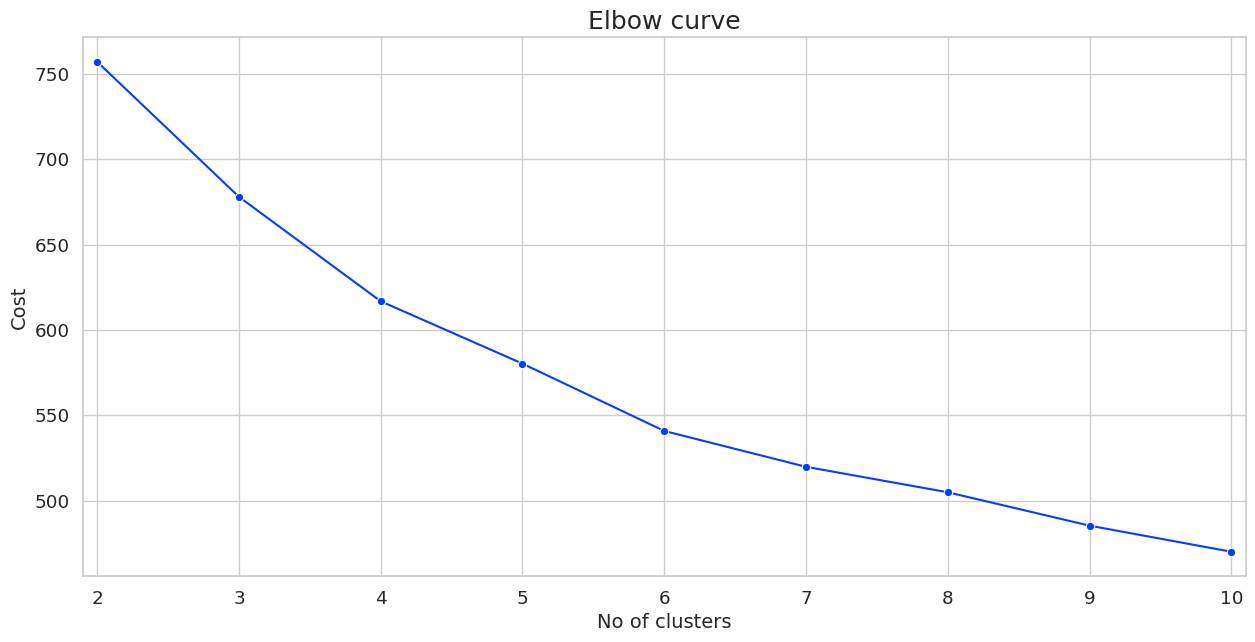

In [ ]:
plot_elbow_curve(2,10,smart_array)

In [ ]:
from sklearn.metrics import silhouette_score

# Funcion para conocer la metrica silhouette de cada cluster
def plot_silhouette_score_curve(start, end, data):

    no_of_clusters = list(range(start, end+1))
    silhouette_score_values = []

    for k in no_of_clusters:
        test_model = KPrototypes(n_clusters=k, init='Cao', random_state=42, n_jobs=-1)
        test_model.fit_predict(data, categorical=categorical_index)
        silhouette_score_values.append(silhouette_score(data, test_model.labels_))

    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)

    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=silhouette_score_values, marker="o", dashes=False)
    ax.set_title('Silhouette Score curve', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Silhouette Score', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    plt.plot();

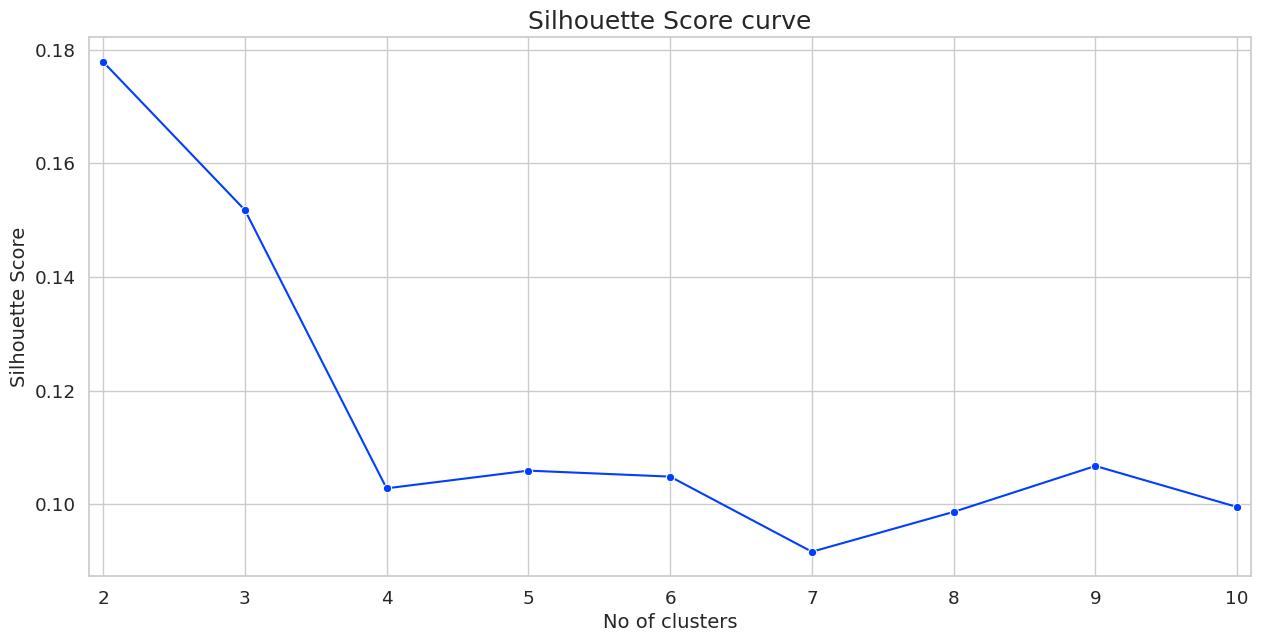

In [ ]:
plot_silhouette_score_curve(2,10,smart_array)

### Clusterización sintomas no motores

In [ ]:
#Seleccion del mejor modelo
model_3 = KPrototypes(n_clusters=3, init='Huang', random_state=42, n_jobs=-1)
model_3.fit_predict(smart_array, categorical=categorical_index)
print(model_3.cost_)

clean_data['labels3'] = model_3.labels_

677.9294059952173


In [ ]:
#Agrupar para visualizar el comportamiento de los clusters
pd.set_option('display.max_rows', None)
clean_data['labels3'] = model_3.labels_
clean_data.groupby('labels3').agg(['median' ,'mean']).T

labels3                                                           0         1  \
Estado mental (p. ej., claridad, atención y mem... median  0.000000  1.000000   
                                                   mean    0.174603  0.687500   
Estado de ánimo y comportamiento (p. ej., depre... median  0.000000  0.000000   
                                                   mean    0.015873  0.218750   
Actividad del día a día y comportamiento.          median  0.000000  1.000000   
                                                   mean    0.349206  0.750000   
Motivación/Iniciativa.                             median  0.000000  1.000000   
                                                   mean    0.412698  0.718750   
Apatia                                             median  0.000000  0.000000   
                                                   mean    0.333333  0.343750   
Control de emocional                               median  0.000000  0.000000   
                                                   mean    0.047619  0.218750   
Problema de sueño                                  median  0.000000  1.000000   
                                                   mean    0.444444  0.687500   
Somnolencia diurna                                 median  0.000000  1.000000   
                                                   mean    0.460317  0.625000   
Presencia de temblor                               median  1.000000  1.000000   
                                                   mean    0.714286  0.687500   
Dificultades para levantarse                       median  0.000000  1.000000   
                                                   mean    0.380952  0.656250   
Problemas con marcha y equilibrio                  median  1.000000  1.000000   
                                                   mean    0.571429  0.812500   
Congelación al caminar                             median  0.000000  1.000000   
                                                   mean    0.253968  0.625000   
Lenguaje                                           median  1.000000  1.000000   
                                                   mean    0.539683  0.593750   
Expresión facial                                   median  1.000000  1.000000   
                                                   mean    0.841270  0.812500   
Rigidez - Cuello                                   median  1.000000  1.000000   
                                                   mean    0.555556  0.812500   
Rigidez - MSD                                      median  1.000000  1.000000   
                                                   mean    0.746032  0.937500   
Rigidez - MSI                                      median  1.000000  1.000000   
                                                   mean    0.714286  0.843750   
Rigidez - MID                                      median  1.000000  1.000000   
                                                   mean    0.730159  0.843750   
Rigidez - MII                                      median  1.000000  1.000000   
                                                   mean    0.714286  0.750000   
IMC                                                median  0.164339 -0.609513   
                                                   mean    0.335307 -0.631633   
MOCA                                               median  0.506096 -1.189848   
                                                   mean    0.364767 -1.289220   
Hoehn y Yahr                                       median -0.478669  0.654181   
                                                   mean   -0.712432  0.300165   
MDS-UPDRS                                          median -0.749671 -0.009841   
                                                   mean   -0.714876 -0.074063   

labels3                                                           2  
Estado mental (p. ej., claridad, atención y mem... median  0.000000  
                                                   m

Como se pudo observar este modelo no ofrece una clusterización que podamos considerar buena a lo más que se puede llegar es a .18 de Silohoutte Score , por lo que la interpretación que pudiéramos dar no aportaría.

In [ ]:
# Calcular el Silhouette Score
silhouette_avg = silhouette_score(neuropsychiatric_data, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.07
Inertia: 706.0


##**Clustering Jerarquico**

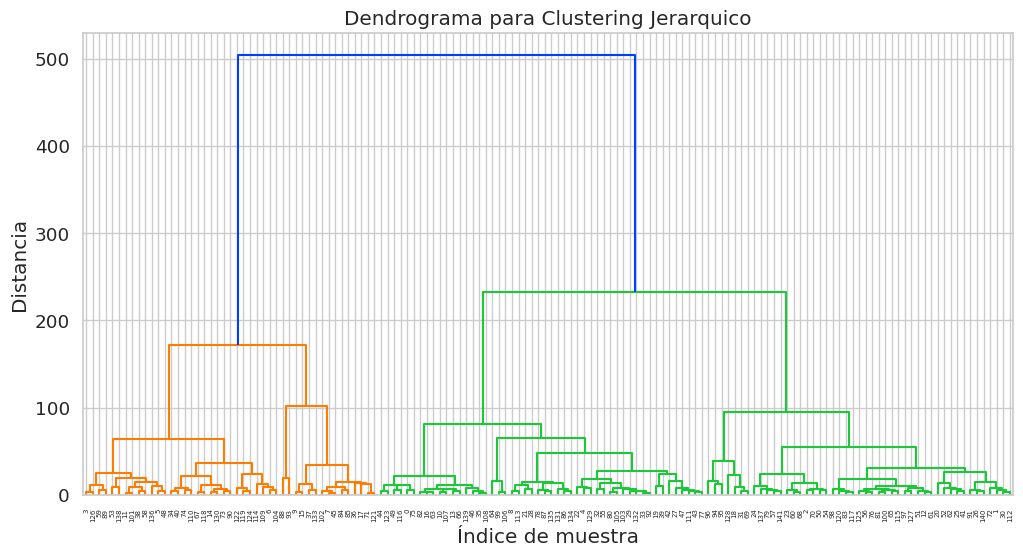

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Generar el linkage matrix para el dendrograma
Z = linkage(neuropsychiatric_data, method='ward')

# Dibujar el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Dendrograma para Clustering Jerarquico')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()

### Clusterización sintomas no motores

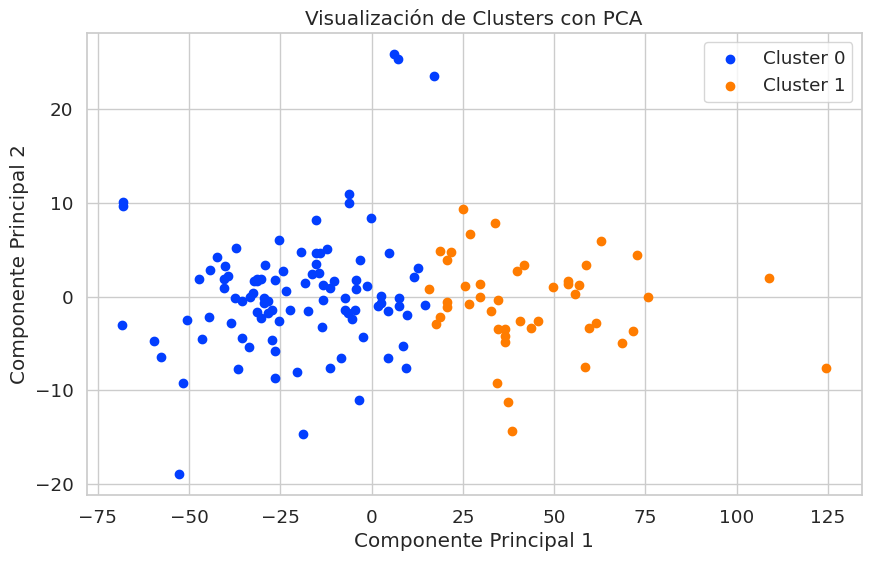

In [ ]:
# Aplicar Agglomerative Clustering con el número de clusters decidido
n_clusters = 2
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
clusters = agg_clustering.fit_predict(neuropsychiatric_data)

# Relacionar clusters con síntomas motores (agregar clusters a los datos de síntomas motores)
motor_data['Cluster'] = clusters
neuropsychiatric_data['Cluster'] = clusters

cluster_means = motor_data.groupby('Cluster').mean()

# Reducción de dimensionalidad con PCA para visualización
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(neuropsychiatric_data.drop(columns=['Cluster']))

# Convertir a DataFrame para facilitar la visualización
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Visualizar los clusters formados
plt.figure(figsize=(10, 6))
for cluster in pca_df['Cluster'].unique():
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('Visualización de Clusters con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluación Interna
silhouette_avg = silhouette_score(neuropsychiatric_data.drop(columns=['Cluster']), clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.56


Num Clusters: 2, Silhouette Score: 0.56
Num Clusters: 3, Silhouette Score: 0.45
Num Clusters: 4, Silhouette Score: 0.44
Num Clusters: 5, Silhouette Score: 0.45
Num Clusters: 6, Silhouette Score: 0.42
Num Clusters: 7, Silhouette Score: 0.34
Num Clusters: 8, Silhouette Score: 0.37
Num Clusters: 9, Silhouette Score: 0.34
Num Clusters: 10, Silhouette Score: 0.33


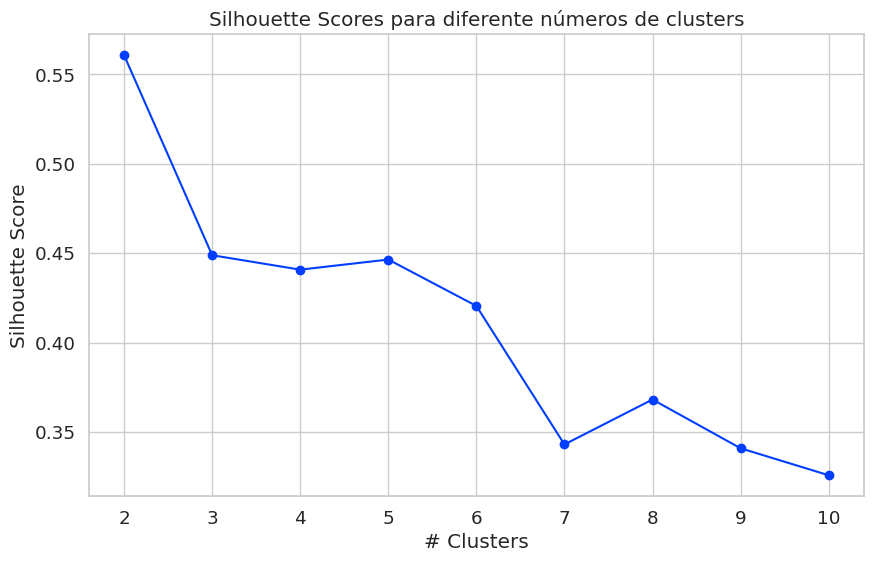

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Función para evaluar diferentes números de clusters
def evaluate_clusters(data, min_clusters=2, max_clusters=10):
    silhouette_scores = []
    for n_clusters in range(min_clusters, max_clusters + 1):
        agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
        clusters = agg_clustering.fit_predict(data)
        if len(np.unique(clusters)) > 1:  # Asegurarse de que no hay solo un cluster
            silhouette_avg = silhouette_score(data, clusters)
            silhouette_scores.append(silhouette_avg)
            print(f'Num Clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.2f}')
        else:
            silhouette_scores.append(-1)  # Indicador de un solo cluster
            print(f'Num Clusters: {n_clusters}, Silhouette Score: Error (Cluster único)')
    return silhouette_scores

# Evaluar diferentes números de clusters
silhouette_scores = evaluate_clusters(neuropsychiatric_data, min_clusters=2, max_clusters=10)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('# Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores para diferente números de clusters')
plt.show()


### **Perfilamiento**

<Axes: ylabel='Cluster'>

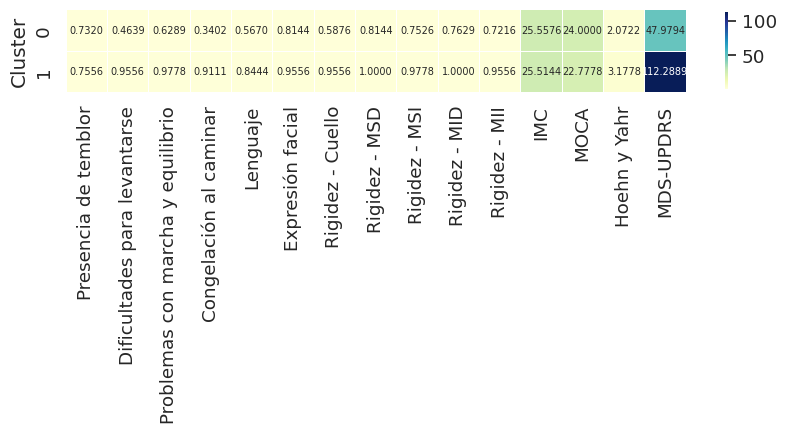

In [ ]:
# Relacionar clusters con síntomas motores (agregar clusters a los datos de síntomas motores)
motor_data['Cluster'] = clusters
neuropsychiatric_data['Cluster'] = clusters

cluster_means_neuro = neuropsychiatric_data.groupby('Cluster').mean()

fig, ax= plt.subplots(figsize=(10, 10))
ax.set_aspect('equal','box')
sns.heatmap(cluster_means_neuro, annot=True, fmt='.4f', cmap='YlGnBu', annot_kws={"size": 7}, linewidth=.5, cbar_kws={'shrink': 0.1})

### Cluster 0: Síntomas Neuropsiquiátricos Moderados

- Estado mental (claridad, atención y memoria): Moderado
- Alucinaciones y psicosis: Bajo
- Estado de ánimo depresivo: Moderado-Alto
- Estado de ánimo ansioso: Alto
- Apatía: Moderado
- Control de emocional: Bajo
- Problema de sueño: Alto
- Somnolencia diurna: Alto

**Descripción:** Este grupo se caracteriza por tener problemas significativos de sueño y somnolencia diurna, así como niveles moderados a altos de estado de ánimo depresivo y ansioso. Sin embargo, presentan baja incidencia de alucinaciones y psicosis, y control emocional.

### Cluster 1: Síntomas Neuropsiquiátricos Severos
- Estado mental (claridad, atención y memoria): Muy alto
- Alucinaciones y psicosis: Muy alto
- Estado de ánimo depresivo: Muy alto
- Estado de ánimo ansioso: Muy alto
- Apatía: Muy alto
- Control de emocional: Muy alto
- Problema de sueño: Muy alto
- Somnolencia diurna: Muy alto


**Descripción:** Este grupo se caracteriza por tener valores muy altos en todas las características, indicando una alta prevalencia de síntomas no motores. Los pacientes en este grupo probablemente experimentan una gama completa de síntomas severos, incluyendo deterioro cognitivo, alucinaciones, estado de ánimo depresivo y ansioso, apatía, problemas de sueño y somnolencia diurna.

<Axes: ylabel='Cluster'>

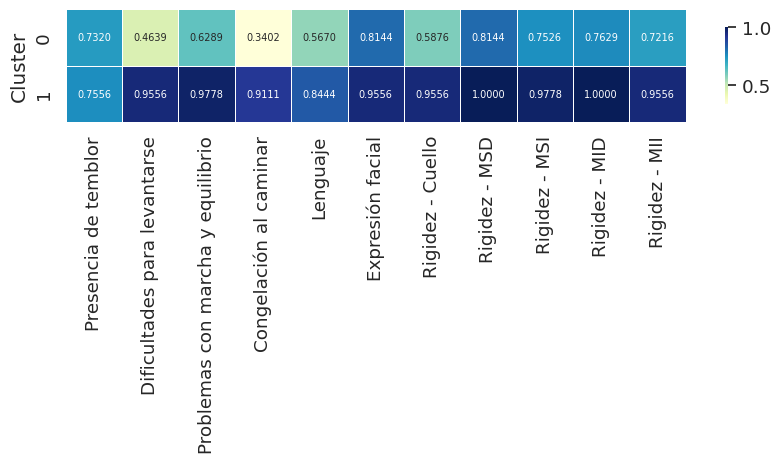

In [ ]:
# Relacionar clusters con síntomas motores (agregar clusters a los datos de síntomas motores)
motor_data['Cluster'] = clusters
neuropsychiatric_data['Cluster'] = clusters

cluster_means = motor_data.groupby('Cluster').mean()

fig, ax= plt.subplots(figsize=(10, 10))
ax.set_aspect('equal','box')
sns.heatmap(cluster_means, annot=True, fmt='.4f', cmap='YlGnBu', annot_kws={"size": 7}, linewidth=.5, cbar_kws={'shrink': 0.1})

### Relación con sintomas motores


####Cluster 0: Síntomas Motores Moderados
- **Presencia de temblor:** 0.732
- **Dificultades para levantarse:** 0.464
- **Problemas con marcha y equilibrio:** 0.629
- **Congelación al caminar:** 0.340
- **Lenguaje:** 0.567
- **Expresión facial:** 0.814
- **Rigidez - Cuello:** 0.587
- **Rigidez - MSD:** 0.814
- **Rigidez - MSI:** 0.753
- **Rigidez - MID:** 0.763
- **Rigidez - MII:** 0.722

**Descripción:**

Este grupo se caracteriza por tener síntomas motores moderados. Aunque la presencia de temblor es relativamente alta, otras dificultades como problemas con la marcha, equilibrio y dificultades para levantarse son moderadas. La rigidez y problemas con la expresión facial también son prominentes pero no tan severos como en el Cluster 1. En general, este grupo muestra una incidencia moderada de la mayoría de los síntomas motores evaluados.

####Cluster 1: Síntomas Motores Severos

- **Presencia de temblor:** 0.756
- **Dificultades para levantarse:** 0.956
- **Problemas con marcha y equilibrio:** 0.978
- **Congelación al caminar:** 0.911
- **Lenguaje:** 0.844
- **Expresión facial:** 0.957
- **Rigidez - Cuello:** 0.957
- **Rigidez - MSD:** 1.000
- **Rigidez - MSI:** 0.978
- **Rigidez - MID:** 1.000
- **Rigidez - MII:** 0.957

**Descripción:**

Este grupo se caracteriza por tener síntomas motores severos en todos los aspectos evaluados. La presencia de temblor, dificultades para levantarse, problemas con la marcha y el equilibrio, y congelación al caminar son extremadamente altas. La rigidez en todas las áreas (cuello, MSD, MSI, MID, MII) es muy alta, con algunos síntomas alcanzando el máximo valor. Además, los problemas de lenguaje y expresión facial también son significativamente elevados. Este grupo presenta una alta prevalencia de síntomas motores severos, indicando una etapa avanzada de la enfermedad.

### Perfilamiento de los Clusters con Variables Motoras y No Motoras

### Cluster 0: Síntomas Moderados

Síntomas Motores:

- Presencia de temblor: Moderado (0.732)
- Dificultades para levantarse: Moderado (0.464)
- Problemas con marcha y equilibrio: Moderado (0.629)
- Congelación al caminar: Moderado-Bajo (0.340)
- Rigidez (en general): Moderado (aproximadamente 0.75)
- Expresión facial: Alto (0.814)

Síntomas Neuropsiquiátricos:

- Estado de ánimo depresivo: Moderado-Alto
- Estado de ánimo ansioso: Alto
- Problema de sueño: Alto
- Somnolencia diurna: Alto

**Descripción:**Este grupo se caracteriza por síntomas motores y neuropsiquiátricos moderados. Predominan la presencia de temblor, rigidez en varias partes del cuerpo y problemas con la marcha y equilibrio. En el aspecto neuropsiquiátrico, los pacientes presentan estados de ánimo depresivo y ansioso moderado a alto, junto con problemas significativos de sueño y somnolencia diurna.

### Cluster 1: Síntomas Severos

Síntomas Motores:

- Presencia de temblor: Alto (0.756)
- Dificultades para levantarse: Muy Alto (0.956)
- Problemas con marcha y equilibrio: Muy Alto (0.978)
- Congelación al caminar: Muy Alto (0.911)
- Rigidez (en general): Muy Alto (cercano a 1.0)
- Expresión facial: Muy Alto (0.957)

Síntomas Neuropsiquiátricos:

- Estado de ánimo depresivo: Muy Alto
- Estado de ánimo ansioso: Muy Alto
- Problema de sueño: Muy Alto
- Somnolencia diurna: Muy Alto

**Descripción:**Este grupo se caracteriza por síntomas motores y neuropsiquiátricos severos. Predominan la presencia de temblor, dificultades extremas para levantarse, problemas con la marcha y equilibrio, y congelación al caminar. La rigidez es muy alta en todas las áreas evaluadas. En el aspecto neuropsiquiátrico, los pacientes presentan niveles muy altos de estado de ánimo depresivo y ansioso, junto con problemas severos de sueño y somnolencia diurna.

## KModes

In [ ]:
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes

In [ ]:
X_to_cluster = X[neuropsychiatric_cols].copy()

In [ ]:
# Crear un pipeline de preprocesamiento que primero estandariza los datos y luego aplica PCA con 4 componentes
n_components = 4
pipeline_pc = Pipeline(steps=[("standard", StandardScaler()), ("pca", PCA(n_components=n_components))])
X_pca = pd.DataFrame(pipeline_pc.fit_transform(X_to_cluster), columns=[f"p_{i}" for i in range(n_components)], index=X_to_cluster.index)

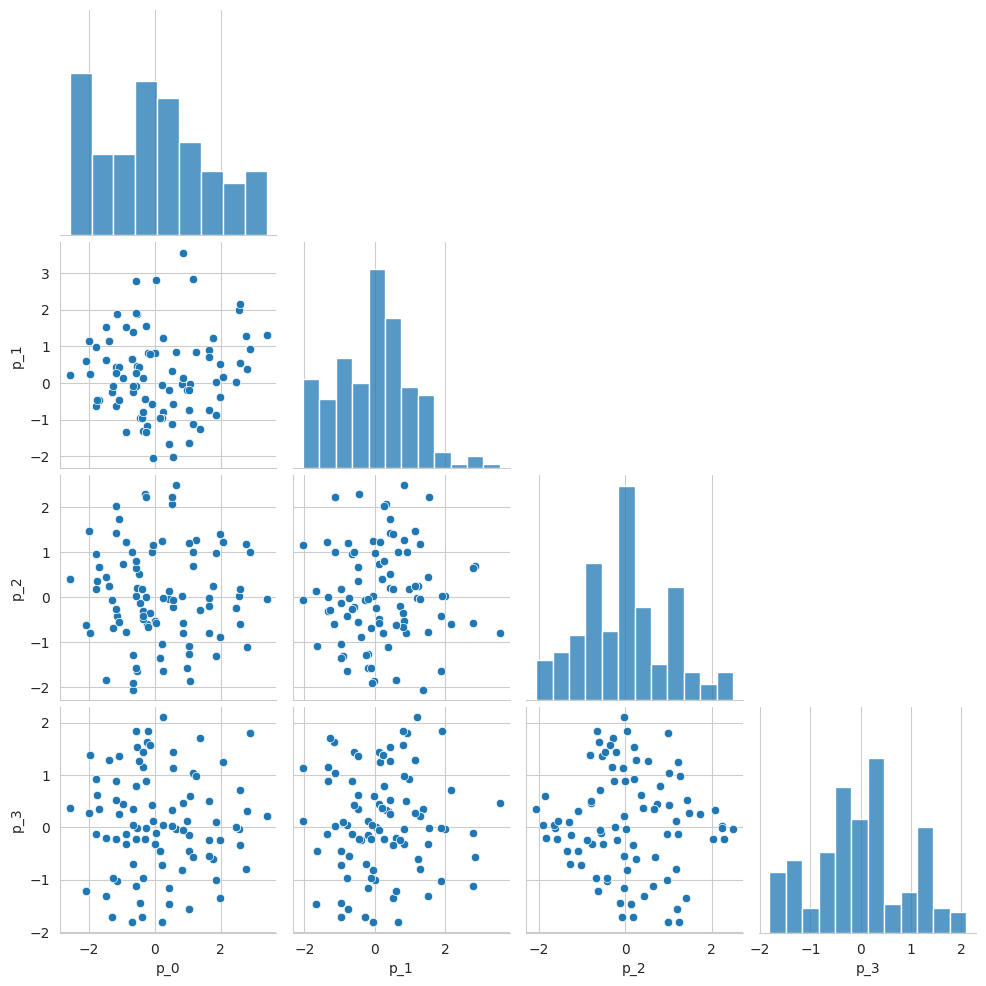

In [ ]:
#Generar un grafico de pares
sns.pairplot(X_pca, corner=True);

In [ ]:
def calculate_cost(model, data):
    return model.inertia_

#Ajustar modelo KModes para cada valor de k, calcular el costo y el puntaje de silueta, y agregarlos a las listas: costs y silhouette_scores
costs = []
silhouette_scores = []
K = range(2, 8)

for k in K:
  kmodes = KModes(n_clusters=k, random_state=42)
  kmodes.fit(X_to_cluster)
  silhouette_scores.append(silhouette_score(X_to_cluster, kmodes.labels_))


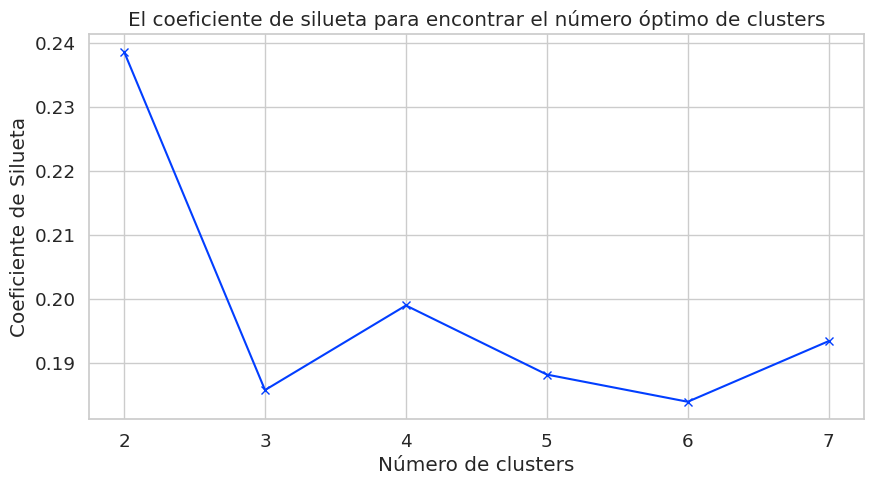

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('El coeficiente de silueta para encontrar el número óptimo de clusters')
plt.show()


In [ ]:
k = 4

### Clusterización sintomas no motores

In [ ]:
Kmodes = KModes(n_clusters=k, random_state=42)
Kmodes.fit(X_to_cluster)
labels = Kmodes.predict(X_to_cluster)
X_pca["cl"] = labels
X_to_cluster["cl"] = labels

In [ ]:
# Calcular el Silhouette Score
silhouette_avg = silhouette_score(X_to_cluster, labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.36


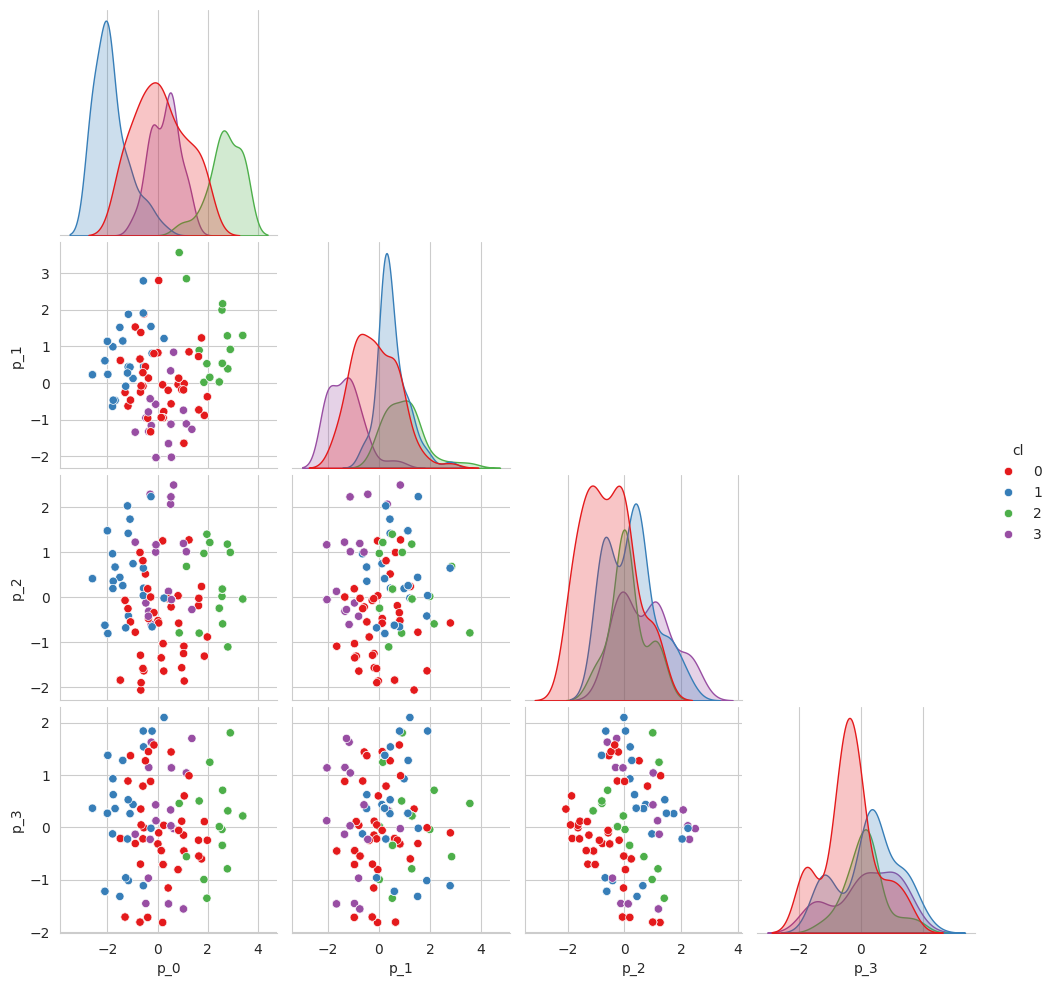

In [ ]:
#Generar un grafico de pares
sns.pairplot(X_pca, hue="cl", corner=True, palette="Set1");

In [ ]:
data_mean_cl = X_to_cluster.groupby("cl")[neuropsychiatric_cols].mean()

<Axes: ylabel='cl'>

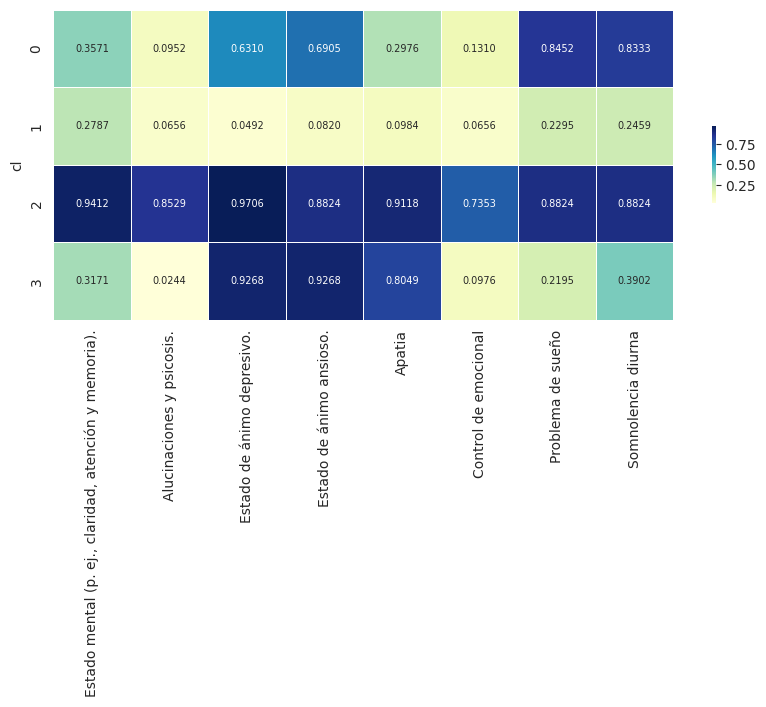

In [ ]:
fig, ax= plt.subplots(figsize=(10, 10))
ax.set_aspect('equal','box')
sns.heatmap(data_mean_cl, annot=True, fmt='.4f', cmap='YlGnBu', annot_kws={"size": 7}, linewidth=.5, cbar_kws={'shrink': 0.1})

In [ ]:
clusters_nombres = {
    0: "Problemas de Sueño y Ansiedad Moderada",
    1: "Síntomas Leves",
    2: "Síntomas Severos Generalizados",
    3: "Depresión y Ansiedad Alta"
}

### Perfilamiento de los Clusters

#### Cluster 0: Problemas de Sueño y Ansiedad Moderada
- **Estado mental (claridad, atención y memoria)**: Moderado
- **Alucinaciones y psicosis**: Bajo
- **Estado de ánimo depresivo**: Moderado-Alto
- **Estado de ánimo ansioso**: Alto
- **Apatía**: Moderado
- **Control de emocional**: Bajo
- **Problema de sueño**: Alto
- **Somnolencia diurna**: Alto

**Descripción**: Este grupo se caracteriza por tener problemas significativos de sueño y somnolencia diurna, así como niveles moderados a altos de estado de ánimo depresivo y ansioso. Sin embargo, presentan baja incidencia de alucinaciones y psicosis, y control emocional.

#### Cluster 1: Síntomas Leves
- **Estado mental (claridad, atención y memoria)**: Moderado
- **Alucinaciones y psicosis**: Bajo
- **Estado de ánimo depresivo**: Muy bajo
- **Estado de ánimo ansioso**: Muy bajo
- **Apatía**: Muy bajo
- **Control de emocional**: Muy bajo
- **Problema de sueño**: Bajo
- **Somnolencia diurna**: Bajo

**Descripción**: Este grupo presenta bajos niveles en todas las características, lo que indica una menor incidencia de síntomas no motores. Los problemas de sueño y somnolencia diurna son relativamente bajos en comparación con otros grupos.

#### Cluster 2: Síntomas Severos Generalizados
- **Estado mental (claridad, atención y memoria)**: Muy alto
- **Alucinaciones y psicosis**: Muy alto
- **Estado de ánimo depresivo**: Muy alto
- **Estado de ánimo ansioso**: Muy alto
- **Apatía**: Muy alto
- **Control de emocional**: Muy alto
- **Problema de sueño**: Muy alto
- **Somnolencia diurna**: Muy alto

**Descripción**: Este grupo se caracteriza por tener valores muy altos en todas las características, indicando una alta prevalencia de síntomas no motores. Los pacientes en este grupo probablemente experimentan una gama completa de síntomas severos, incluyendo deterioro cognitivo, alucinaciones, estado de ánimo depresivo y ansioso, apatía, problemas de sueño y somnolencia diurna.

#### Cluster 3: Depresión y Ansiedad Alta
- **Estado mental (claridad, atención y memoria)**: Moderado
- **Alucinaciones y psicosis**: Muy bajo
- **Estado de ánimo depresivo**: Muy alto
- **Estado de ánimo ansioso**: Muy alto
- **Apatía**: Alto
- **Control de emocional**: Muy bajo
- **Problema de sueño**: Moderado
- **Somnolencia diurna**: Moderado

**Descripción**: Este grupo se caracteriza por una alta incidencia de estado de ánimo depresivo y ansioso, así como niveles altos de apatía. Presentan muy bajos niveles de alucinaciones y psicosis, y control emocional. Los problemas de sueño y somnolencia diurna son moderados.


### **Relacion con sintomas motores**

In [ ]:
X["cl"] = labels

In [ ]:
data_mean_cl_motor = X.groupby("cl")[motor_cols].mean()

<Axes: ylabel='cl'>

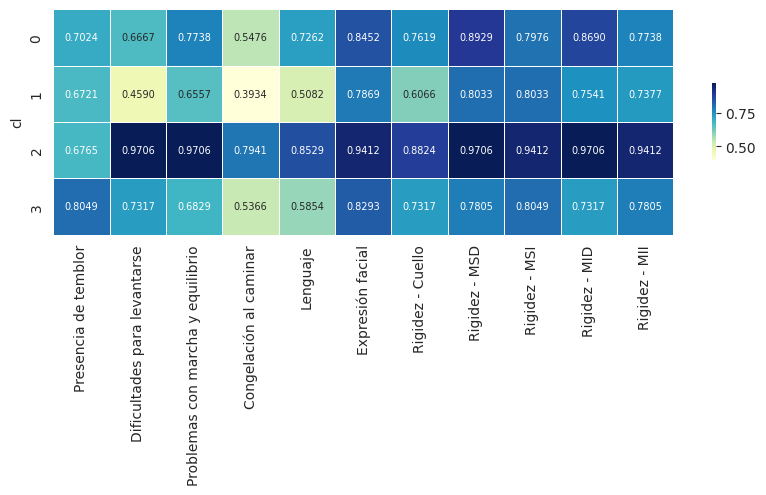

In [ ]:
fig, ax= plt.subplots(figsize=(10, 10))
ax.set_aspect('equal','box')
sns.heatmap(data_mean_cl_motor, annot=True, fmt='.4f', cmap='YlGnBu', annot_kws={"size": 7}, linewidth=.5, cbar_kws={'shrink': 0.1})

### Perfilamiento de los Clusters con Variables Motoras y No Motoras

#### Cluster 0: Problemas de Sueño y Ansiedad Moderada
- **Presencia de temblor**: Alta
- **Dificultades para levantarse**: Alta
- **Problemas con marcha y equilibrio**: Moderado
- **Congelación al caminar**: Alto
- **Lenguaje**: Muy alto
- **Expresión facial**: Alta
- **Rigidez - Cuello**: Alta
- **Rigidez - MSD (Miembro Superior Derecho)**: Muy alta
- **Rigidez - MSI (Miembro Superior Izquierdo)**: Alta
- **Rigidez - MID (Miembro Inferior Derecho)**: Muy alta
- **Rigidez - MII (Miembro Inferior Izquierdo)**: Alta

**Descripción**: Este grupo se caracteriza por tener problemas significativos de sueño y somnolencia diurna, así como niveles moderados a altos de estado de ánimo depresivo y ansioso. En cuanto a los síntomas motores, presentan alta presencia de temblor, dificultades para levantarse, y rigidez en varias áreas del cuerpo.

#### Cluster 1: Síntomas Leves
- **Presencia de temblor**: Moderada
- **Dificultades para levantarse**: Moderada
- **Problemas con marcha y equilibrio**: Moderada
- **Congelación al caminar**: Moderada
- **Lenguaje**: Moderada
- **Expresión facial**: Muy alta
- **Rigidez - Cuello**: Alta
- **Rigidez - MSD (Miembro Superior Derecho)**: Alta
- **Rigidez - MSI (Miembro Superior Izquierdo)**: Moderada
- **Rigidez - MID (Miembro Inferior Derecho)**: Moderada
- **Rigidez - MII (Miembro Inferior Izquierdo)**: Moderada

**Descripción**: Este grupo presenta bajos niveles en todas las características no motoras, lo que indica una menor incidencia de síntomas no motores. Los problemas de sueño y somnolencia diurna son relativamente bajos. En términos de síntomas motores, presentan niveles moderados en la mayoría de las características, con expresión facial muy alta y rigidez moderada.

#### Cluster 2: Síntomas Severos Generalizados
- **Presencia de temblor**: Alta
- **Dificultades para levantarse**: Muy alta
- **Problemas con marcha y equilibrio**: Muy alta
- **Congelación al caminar**: Muy alta
- **Lenguaje**: Muy alta
- **Expresión facial**: Muy alta
- **Rigidez - Cuello**: Muy alta
- **Rigidez - MSD (Miembro Superior Derecho)**: Muy alta
- **Rigidez - MSI (Miembro Superior Izquierdo)**: Muy alta
- **Rigidez - MID (Miembro Inferior Derecho)**: Muy alta
- **Rigidez - MII (Miembro Inferior Izquierdo)**: Muy alta

**Descripción**: Este grupo se caracteriza por tener valores muy altos en todas las características no motoras, indicando una alta prevalencia de síntomas no motores. Los pacientes en este grupo probablemente experimentan una gama completa de síntomas severos, incluyendo deterioro cognitivo, alucinaciones, estado de ánimo depresivo y ansioso, apatía, problemas de sueño y somnolencia diurna. En cuanto a los síntomas motores, tienen niveles muy altos en todas las áreas, indicando una severa afectación motora.

#### Cluster 3: Depresión y Ansiedad Alta
- **Presencia de temblor**: Alto
- **Dificultades para levantarse**: Alto
- **Problemas con marcha y equilibrio**: Moderado
- **Congelación al caminar**: Moderado
- **Lenguaje**: Alto
- **Expresión facial**: Alta
- **Rigidez - Cuello**: Moderada
- **Rigidez - MSD (Miembro Superior Derecho)**: Alta
- **Rigidez - MSI (Miembro Superior Izquierdo)**: Moderada
- **Rigidez - MID (Miembro Inferior Derecho)**: Alta
- **Rigidez - MII (Miembro Inferior Izquierdo)**: Moderada

**Descripción**: Este grupo se caracteriza por una alta incidencia de estado de ánimo depresivo y ansioso, así como niveles altos de apatía. Presentan muy bajos niveles de alucinaciones y psicosis, y control emocional. Los problemas de sueño y somnolencia diurna son moderados. En términos de síntomas motores, presentan altos niveles de temblor y rigidez, con moderadas dificultades para levantarse y problemas de marcha y equilibrio.

## **Cluster DBSCAN con metrica Hamming**

### Clusterización sintomas no motores

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
X_to_cluster = X[neuropsychiatric_cols].copy()
n_components = 4
pipeline_pc = Pipeline(steps=[("standard", StandardScaler()), ("pca", PCA(n_components=n_components))])
X_pca = pd.DataFrame(pipeline_pc.fit_transform(X_to_cluster), columns=[f"p_{i}" for i in range(n_components)], index=X_to_cluster.index)

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='hamming')
labels = dbscan.fit_predict(X_to_cluster)

In [ ]:
X_pca["cl"] = labels
X_to_cluster["cl"] = labels

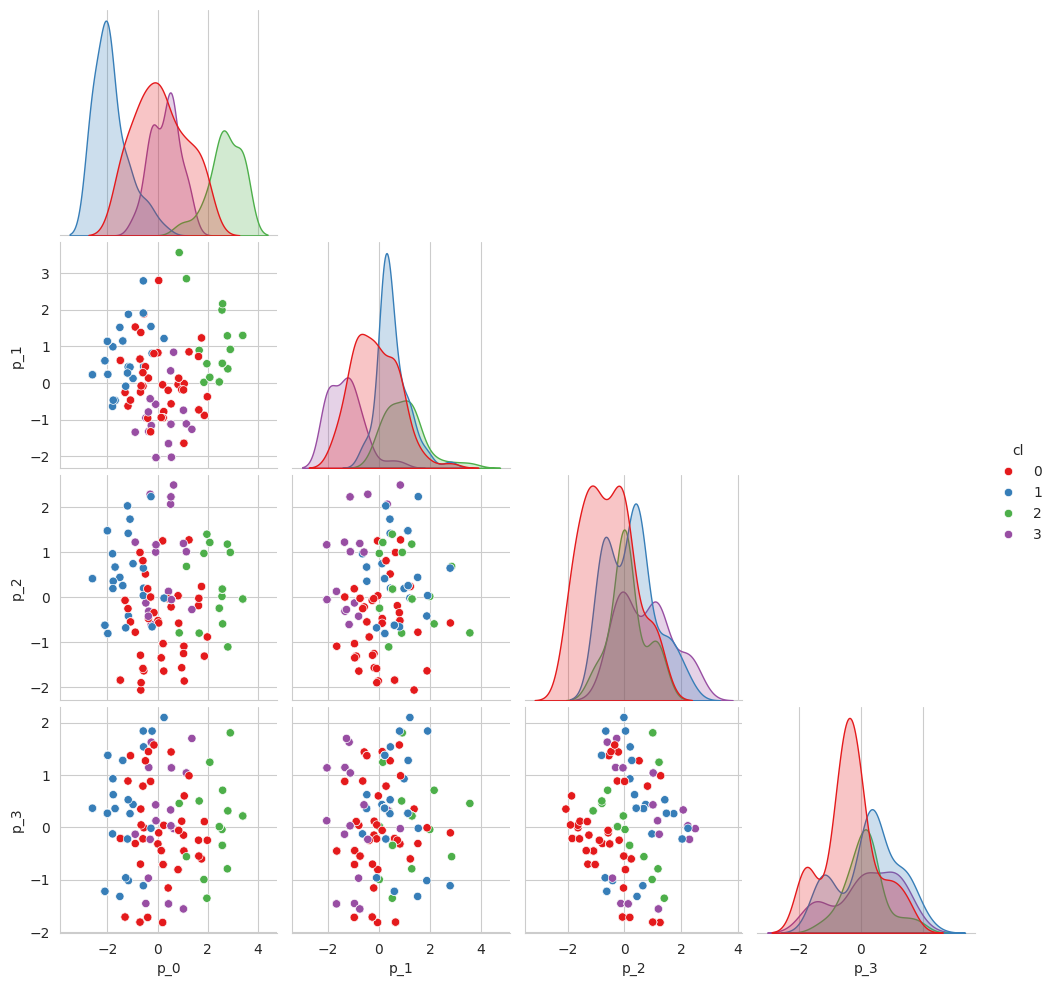

In [ ]:
sns.pairplot(X_pca, hue="cl", corner=True, palette="Set1");

In [ ]:
data_mean_cl = X_to_cluster.groupby("cl")[neuropsychiatric_cols].mean()

<Axes: ylabel='cl'>

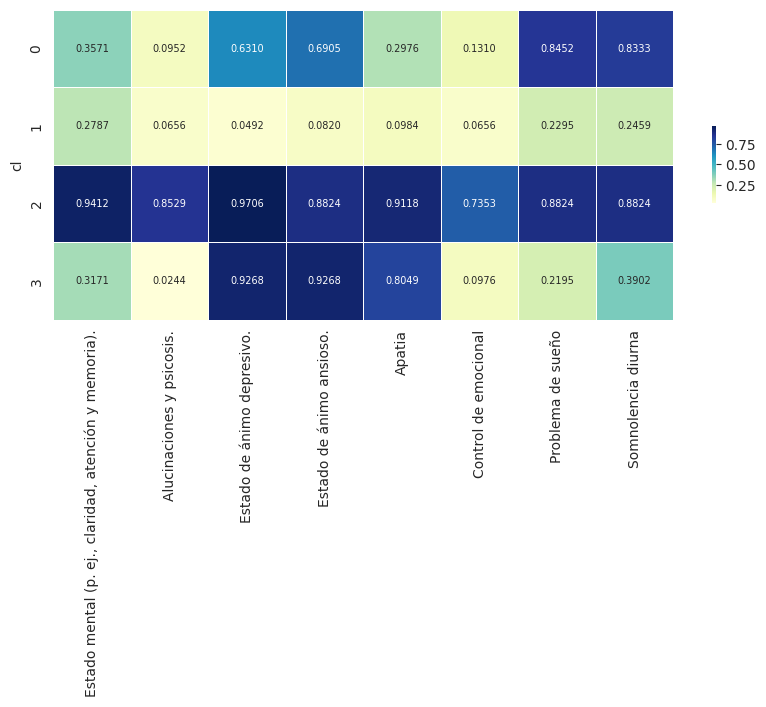

In [ ]:
fig, ax= plt.subplots(figsize=(10, 10))
ax.set_aspect('equal','box')
sns.heatmap(data_mean_cl, annot=True, fmt='.4f', cmap='YlGnBu', annot_kws={"size": 7}, linewidth=.5, cbar_kws={'shrink': 0.1})

### Perfilamiento de los Clusters

In [ ]:
clusters_nombres = {
    0: "Ansiedad y Problemas de Sueño",
    1: "Síntomas Leves y Menores Problemas de Sueño",
    2: "Síntomas Severos y Generalizados",
    3: "Depresión y Ansiedad Alta con Moderados Problemas de Sueño"
}

### **Relacion con sintomas motores**

<Axes: ylabel='cl'>

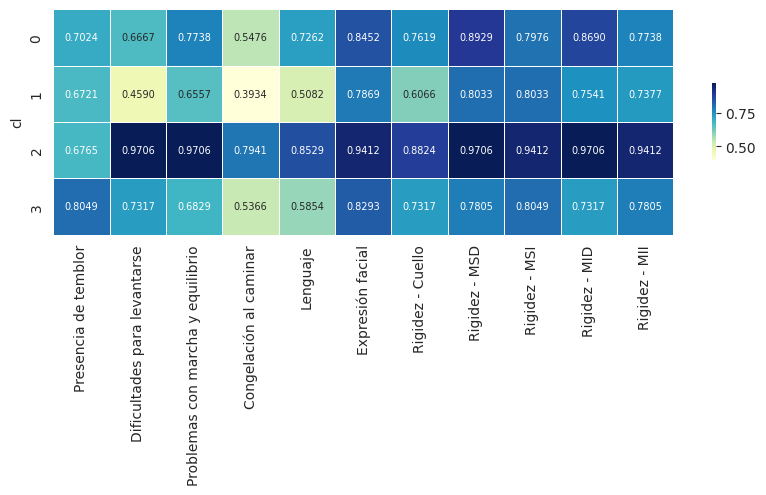

In [ ]:
X["cl"] = labels
data_mean_cl_motor = X.groupby("cl")[motor_cols].mean()
fig, ax= plt.subplots(figsize=(10, 10))
ax.set_aspect('equal','box')
sns.heatmap(data_mean_cl_motor, annot=True, fmt='.4f', cmap='YlGnBu', annot_kws={"size": 7}, linewidth=.5, cbar_kws={'shrink': 0.1})

### Perfilamiento de los Clusters con Variables Motoras y No Motoras

#### Cluster 0: Ansiedad y Problemas de Sueño
- **Presencia de temblor**: Alta
- **Dificultades para levantarse**: Alta
- **Problemas con marcha y equilibrio**: Alto
- **Congelación al caminar**: Moderado
- **Lenguaje**: Alto
- **Expresión facial**: Muy alto
- **Rigidez - Cuello**: Alta
- **Rigidez - MSD (Miembro Superior Derecho)**: Alta
- **Rigidez - MSI (Miembro Superior Izquierdo)**: Alta
- **Rigidez - MID (Miembro Inferior Derecho)**: Muy alta
- **Rigidez - MII (Miembro Inferior Izquierdo)**: Alta

**Descripción**: Este grupo se caracteriza por tener problemas significativos de sueño y somnolencia diurna, así como niveles moderados a altos de estado de ánimo depresivo y ansioso. En cuanto a los síntomas motores, presentan alta presencia de temblor, dificultades para levantarse, problemas con marcha y equilibrio, y rigidez en varias áreas del cuerpo.

#### Cluster 1: Síntomas Leves y Menores Problemas de Sueño
- **Presencia de temblor**: Moderada
- **Dificultades para levantarse**: Moderada
- **Problemas con marcha y equilibrio**: Moderada
- **Congelación al caminar**: Moderada
- **Lenguaje**: Moderada
- **Expresión facial**: Muy alta
- **Rigidez - Cuello**: Alta
- **Rigidez - MSD (Miembro Superior Derecho)**: Alta
- **Rigidez - MSI (Miembro Superior Izquierdo)**: Moderada
- **Rigidez - MID (Miembro Inferior Derecho)**: Moderada
- **Rigidez - MII (Miembro Inferior Izquierdo)**: Moderada

**Descripción**: Este grupo presenta bajos niveles en todas las características no motoras, lo que indica una menor incidencia de síntomas no motores. Los problemas de sueño y somnolencia diurna son relativamente bajos. En términos de síntomas motores, presentan niveles moderados en la mayoría de las características, con expresión facial muy alta y rigidez moderada.

#### Cluster 2: Síntomas Severos y Generalizados
- **Presencia de temblor**: Alta
- **Dificultades para levantarse**: Muy alta
- **Problemas con marcha y equilibrio**: Muy alta
- **Congelación al caminar**: Muy alta
- **Lenguaje**: Muy alta
- **Expresión facial**: Muy alta
- **Rigidez - Cuello**: Muy alta
- **Rigidez - MSD (Miembro Superior Derecho)**: Muy alta
- **Rigidez - MSI (Miembro Superior Izquierdo)**: Muy alta
- **Rigidez - MID (Miembro Inferior Derecho)**: Muy alta
- **Rigidez - MII (Miembro Inferior Izquierdo)**: Muy alta

**Descripción**: Este grupo se caracteriza por tener valores muy altos en todas las características no motoras, indicando una alta prevalencia de síntomas no motores. Los pacientes en este grupo probablemente experimentan una gama completa de síntomas severos, incluyendo deterioro cognitivo, alucinaciones, estado de ánimo depresivo y ansioso, apatía, problemas de sueño y somnolencia diurna. En cuanto a los síntomas motores, tienen niveles muy altos en todas las áreas, indicando una severa afectación motora.

#### Cluster 3: Depresión y Ansiedad Alta con Moderados Problemas de Sueño
- **Presencia de temblor**: Alto
- **Dificultades para levantarse**: Alto
- **Problemas con marcha y equilibrio**: Moderado
- **Congelación al caminar**: Moderado
- **Lenguaje**: Moderado
- **Expresión facial**: Alta
- **Rigidez - Cuello**: Moderado
- **Rigidez - MSD (Miembro Superior Derecho)**: Alto
- **Rigidez - MSI (Miembro Superior Izquierdo)**: Moderado
- **Rigidez - MID (Miembro Inferior Derecho)**: Alto
- **Rigidez - MII (Miembro Inferior Izquierdo)**: Moderado

**Descripción**: Este grupo se caracteriza por una alta incidencia de estado de ánimo depresivo y ansioso, así como niveles altos de apatía. Presentan muy bajos niveles de alucinaciones y psicosis, y control emocional. Los problemas de sueño y somnolencia diurna son moderados. En términos de síntomas motores, presentan altos niveles de temblor y rigidez, con moderadas dificultades para levantarse y problemas de marcha y equilibrio.

## **Cluster Kmodes combinación con modelo supervisado**

In [ ]:
from kmodes.kmodes import KModes

In [ ]:
X = data[all_updrs].copy()
X_to_cluster = X[motor_cols].copy()

In [ ]:
# Crear un pipeline de preprocesamiento que primero estandariza los datos y luego aplica PCA con 4 componentes
n_components = 4
pipeline_pc = Pipeline(steps=[("standard", StandardScaler()), ("pca", PCA(n_components=n_components))])
X_pca = pd.DataFrame(pipeline_pc.fit_transform(X_to_cluster), columns=[f"p_{i}" for i in range(n_components)], index=X_to_cluster.index)

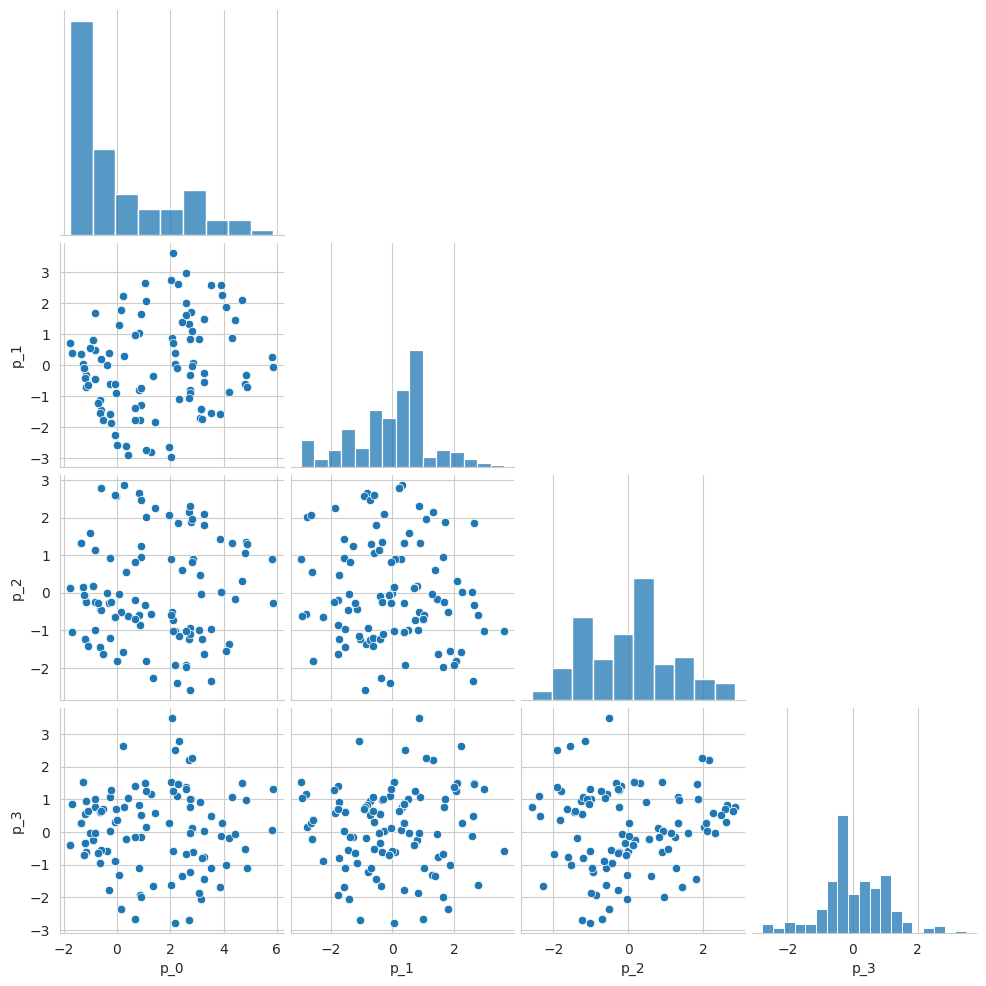

In [ ]:
#Generar un grafico de pares
sns.pairplot(X_pca, corner=True);

In [ ]:
def calculate_cost(model, data):
    return model.inertia_

#Ajustar modelo KModes para cada valor de k, calcular el costo y el puntaje de silueta, y agregarlos a las listas: costs y silhouette_scores
costs = []
silhouette_scores = []
K = range(2, 8)

for k in K:
  kmodes = KModes(n_clusters=k, random_state=42, )
  kmodes.fit(X_to_cluster)
  costs.append(kmodes.cost_)
  silhouette_scores.append(silhouette_score(X_to_cluster, kmodes.labels_))


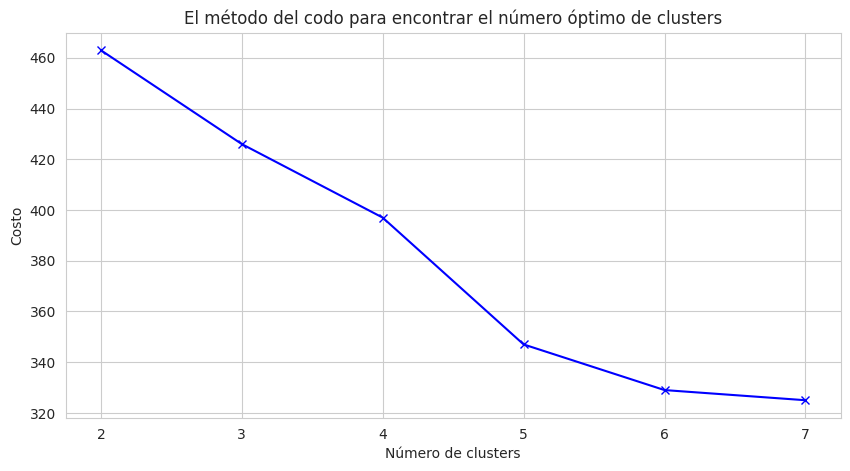

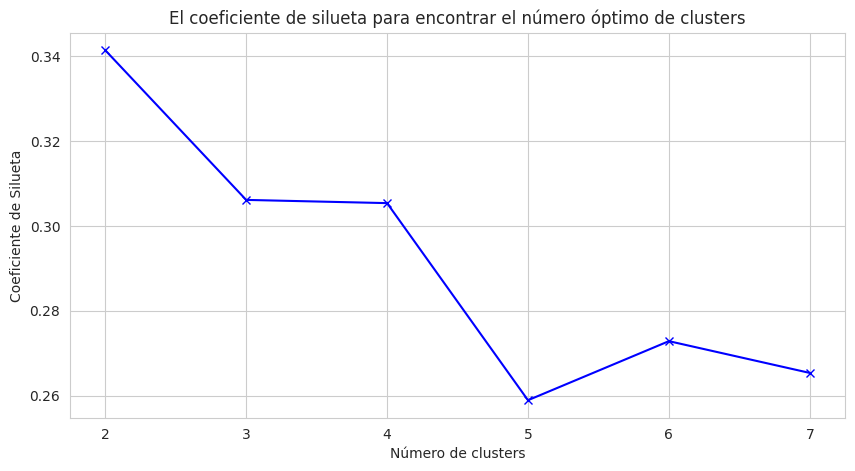

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(K, costs, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('El método del codo para encontrar el número óptimo de clusters')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('El coeficiente de silueta para encontrar el número óptimo de clusters')
plt.show()


In [ ]:
k = 4

In [ ]:
Kmodes = KModes(n_clusters=k, random_state=42)
Kmodes.fit(X_to_cluster)
labels = Kmodes.predict(X_to_cluster)
X_pca["cl"] = labels
X_to_cluster["cl"] = labels

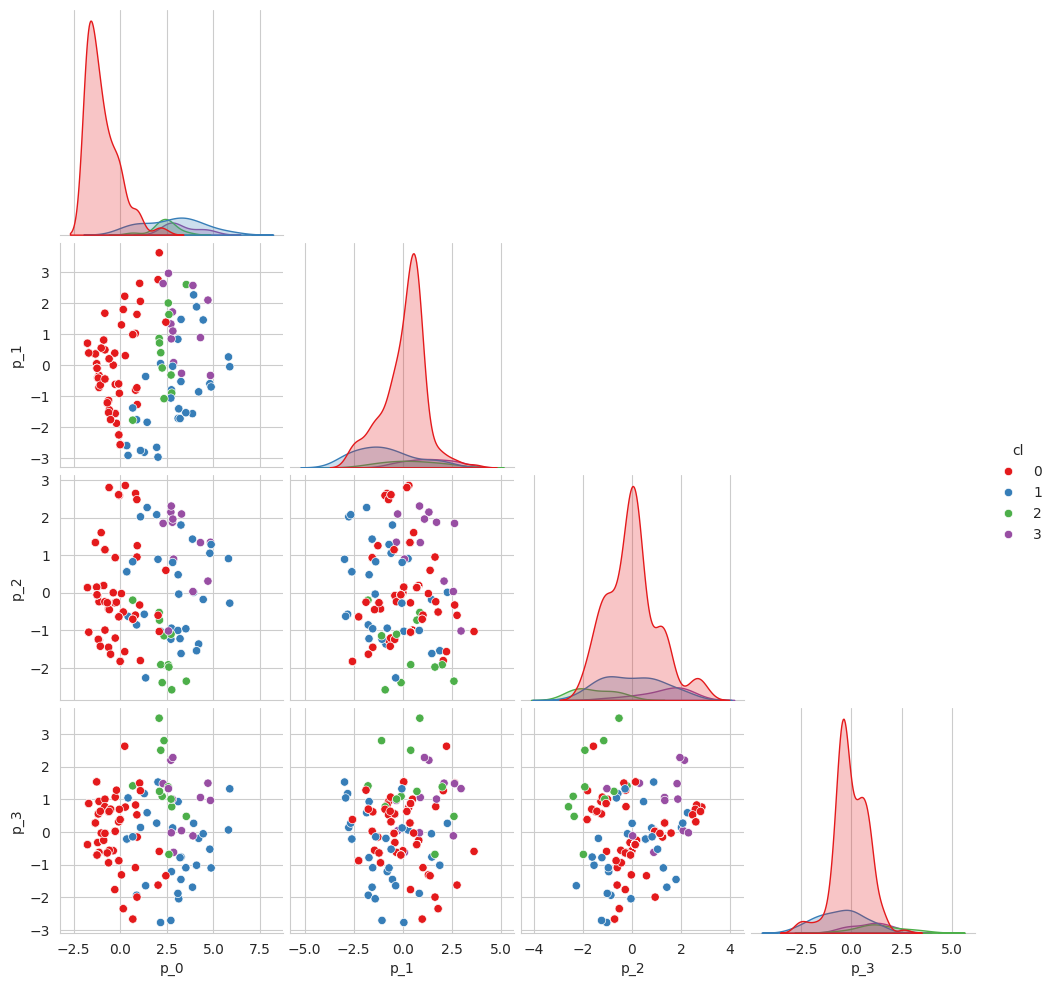

In [ ]:
sns.pairplot(X_pca, hue="cl", corner=True, palette="Set1");

In [ ]:
data_mean_cl = X_to_cluster.groupby("cl")[motor_cols].mean()

<Axes: ylabel='cl'>

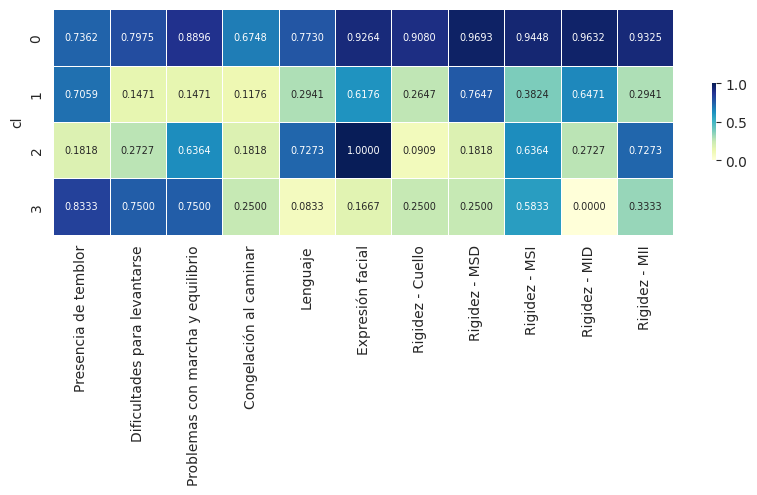

In [ ]:
fig, ax= plt.subplots(figsize=(10, 10))
ax.set_aspect('equal','box')
sns.heatmap(data_mean_cl, annot=True, fmt='.4f', cmap='YlGnBu', annot_kws={"size": 7}, linewidth=.5, cbar_kws={'shrink': 0.1})

### Perfilamiento de los Clusters con Variables Motoras

#### Cluster 0: Alta Presencia de Síntomas Motores
- **Presencia de temblor**: Muy alta
- **Dificultades para levantarse**: Muy alta
- **Problemas con marcha y equilibrio**: Muy alta
- **Congelación al caminar**: Alta
- **Lenguaje**: Moderada
- **Expresión facial**: Muy alta
- **Rigidez - Cuello**: Muy alta
- **Rigidez - MSD (Miembro Superior Derecho)**: Muy alta
- **Rigidez - MSI (Miembro Superior Izquierdo)**: Muy alta
- **Rigidez - MID (Miembro Inferior Derecho)**: Muy alta
- **Rigidez - MII (Miembro Inferior Izquierdo)**: Muy alta

**Descripción**: Este grupo se caracteriza por una alta presencia de síntomas motores en general. Los pacientes en este cluster tienen niveles muy altos de temblor, dificultades para levantarse, problemas de marcha y equilibrio, rigidez en varias áreas del cuerpo y expresión facial muy alta.

#### Cluster 1: Síntomas Motores Leves
- **Presencia de temblor**: Moderada
- **Dificultades para levantarse**: Muy baja
- **Problemas con marcha y equilibrio**: Muy baja
- **Congelación al caminar**: Muy baja
- **Lenguaje**: Moderada
- **Expresión facial**: Moderada
- **Rigidez - Cuello**: Alta
- **Rigidez - MSD (Miembro Superior Derecho)**: Moderada
- **Rigidez - MSI (Miembro Superior Izquierdo)**: Moderada
- **Rigidez - MID (Miembro Inferior Derecho)**: Moderada
- **Rigidez - MII (Miembro Inferior Izquierdo)**: Baja

**Descripción**: Este grupo presenta niveles muy bajos en la mayoría de los síntomas motores, con niveles moderados de temblor y expresión facial. La rigidez está presente, pero es más leve en comparación con otros grupos.

#### Cluster 2: Síntomas Motores Mínimos
- **Presencia de temblor**: Baja
- **Dificultades para levantarse**: Baja
- **Problemas con marcha y equilibrio**: Moderada
- **Congelación al caminar**: Baja
- **Lenguaje**: Muy alta
- **Expresión facial**: Muy baja
- **Rigidez - Cuello**: Baja
- **Rigidez - MSD (Miembro Superior Derecho)**: Baja
- **Rigidez - MSI (Miembro Superior Izquierdo)**: Moderada
- **Rigidez - MID (Miembro Inferior Derecho)**: Baja
- **Rigidez - MII (Miembro Inferior Izquierdo)**: Moderada

**Descripción**: Este grupo presenta los niveles más bajos de síntomas motores en general, con la excepción de problemas de marcha y equilibrio que son moderados, y el lenguaje que es muy alto.

#### Cluster 3: Alta Presencia de Temblor y Rigidez
- **Presencia de temblor**: Muy alta
- **Dificultades para levantarse**: Alta
- **Problemas con marcha y equilibrio**: Alta
- **Congelación al caminar**: Baja
- **Lenguaje**: Muy baja
- **Expresión facial**: Muy baja
- **Rigidez - Cuello**: Moderada
- **Rigidez - MSD (Miembro Superior Derecho)**: Baja
- **Rigidez - MSI (Miembro Superior Izquierdo)**: Baja
- **Rigidez - MID (Miembro Inferior Derecho)**: Baja
- **Rigidez - MII (Miembro Inferior Izquierdo)**: Baja

**Descripción**: Este grupo se caracteriza por una muy alta presencia de temblor y rigidez moderada. Las dificultades para levantarse y los problemas de marcha y equilibrio son también altas, mientras que el lenguaje y la expresión facial son muy bajas.

### Modelo supervisado e importancia de los sintomas no motores

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import classification_report

In [ ]:
X["cl"] = labels

In [ ]:
X_to_model = X[neuropsychiatric_cols].copy()
y = X["cl"].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_to_model,
                                                    y, test_size=0.10, random_state=42)

In [ ]:
model = LogisticRegressionCV(Cs=10, cv=4, random_state=42)
model.fit(X_train, y_train)

LogisticRegressionCV(cv=4, random_state=42)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [ ]:
pd.DataFrame(classification_report(y_pred=y_train_predict, y_true=y_train, output_dict=True))

,0,1,2,3,accuracy,macro avg,weighted avg
precision,0.727273,0.0,0.0,0.0,0.727273,0.181818,0.528926
recall,1.000000,0.0,0.0,0.0,0.727273,0.250000,0.727273
f1-score,0.842105,0.0,0.0,0.0,0.727273,0.210526,0.612440
support,144.000000,32.0,10.0,12.0,0.727273,198.000000,198.000000


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring)

print("Accuracy for each fold: ", scores['test_accuracy'])
print("Mean accuracy: ", np.mean(scores['test_accuracy']))
print("Standard deviation of accuracy: ", np.std(scores['test_accuracy']))

print("\nPrecision for each fold: ", scores['test_precision_macro'])
print("Mean precision: ", np.mean(scores['test_precision_macro']))
print("Standard deviation of precision: ", np.std(scores['test_precision_macro']))

print("\nRecall for each fold: ", scores['test_recall_macro'])
print("Mean recall: ", np.mean(scores['test_recall_macro']))
print("Standard deviation of recall: ", np.std(scores['test_recall_macro']))

print("\nF1-score for each fold: ", scores['test_f1_macro'])
print("Mean F1-score: ", np.mean(scores['test_f1_macro']))
print("Standard deviation of F1-score: ", np.std(scores['test_f1_macro']))

Accuracy for each fold:  [0.7        0.65       0.55       0.66666667 0.64102564]
Mean accuracy:  0.6415384615384616
Standard deviation of accuracy:  0.05000065745787339

Precision for each fold:  [0.31785714 0.30357143 0.16666667 0.25189394 0.25604839]
Mean precision:  0.25920751291719035
Standard deviation of precision:  0.0529815302962495

Recall for each fold:  [0.35       0.25718391 0.19642857 0.25123153 0.33928571]
Mean recall:  0.2788259441707718
Standard deviation of recall:  0.05786239995334957

F1-score for each fold:  [0.33269231 0.2578125  0.18032787 0.24706745 0.28672316]
Mean F1-score:  0.2609246578133853
Standard deviation of F1-score:  0.05002740977597436


In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [ ]:
pd.DataFrame(classification_report(y_pred=y_train_predict, y_true=y_train, output_dict=True))

,0,1,2,3,accuracy,macro avg,weighted avg
precision,0.825301,0.680000,1.000000,0.833333,0.808081,0.834659,0.811128
recall,0.951389,0.531250,0.100000,0.416667,0.808081,0.499826,0.808081
f1-score,0.883871,0.596491,0.181818,0.555556,0.808081,0.554434,0.782071
support,144.000000,32.000000,10.000000,12.000000,0.808081,198.000000,198.000000


In [ ]:
data_importance = pd.DataFrame(zip(X.columns, model.feature_importances_), columns = ["variables", "importance"])

<Axes: ylabel='variables'>

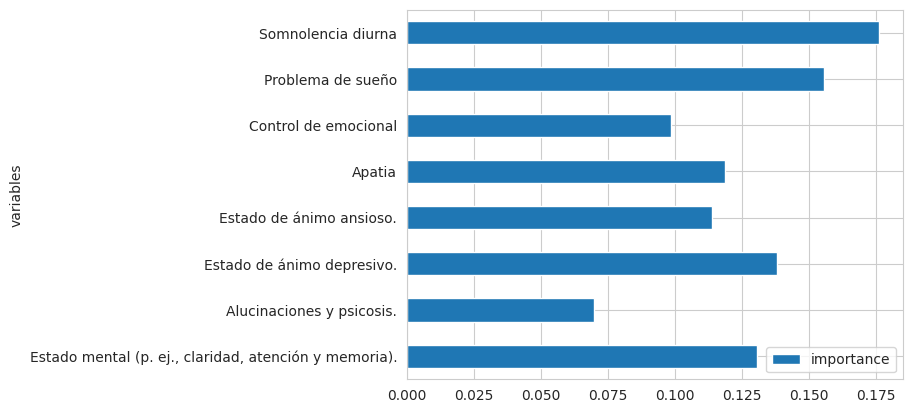

In [ ]:
data_importance.plot.barh(x="variables", y="importance", )

In [ ]:
!pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.1 MB/s eta 0:00:00


In [ ]:
import shap


In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)

In [ ]:
X_train.shape

(198, 8)

In [ ]:
clusters_nombres = {
    0: "Alta Presencia de Síntomas Motores",
    1: "Síntomas Motores Leves",
    2: "Síntomas Motores Mínimos",
    3: "Alta Presencia de Temblor y Rigidez"
}


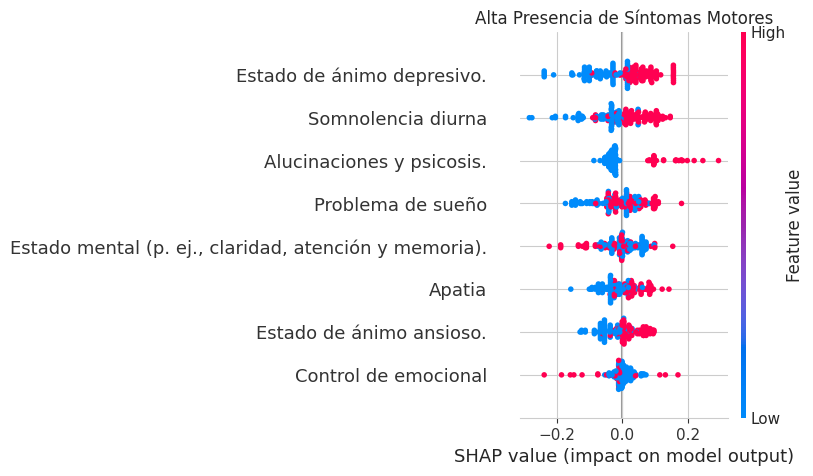

In [ ]:
shap.summary_plot(shap_values[:,:,0], X_train, show=False)
plt.title(clusters_nombres[0])
plt.show()

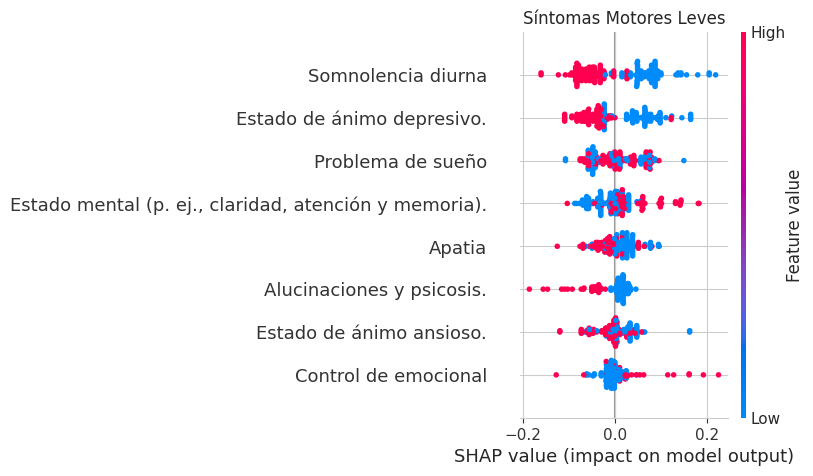

In [ ]:
shap.summary_plot(shap_values[:,:,1], X_train, show=False)
plt.title(clusters_nombres[1])
plt.show()

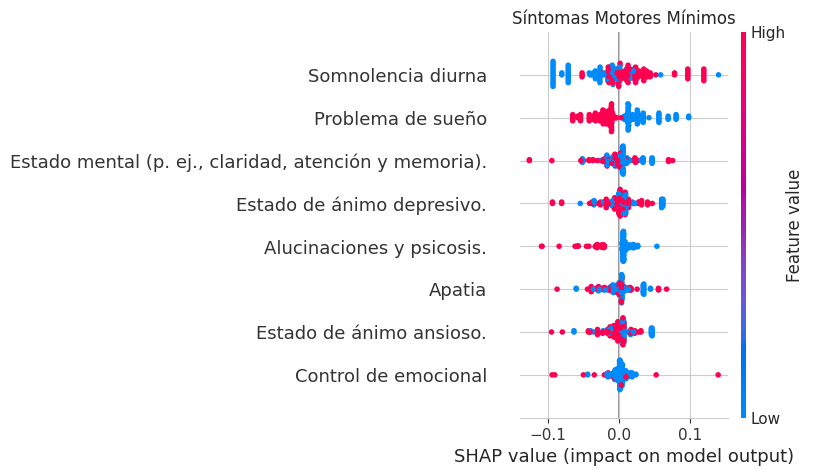

In [ ]:
shap.summary_plot(shap_values[:,:,2], X_train, show=False)
plt.title(clusters_nombres[2])
plt.show()

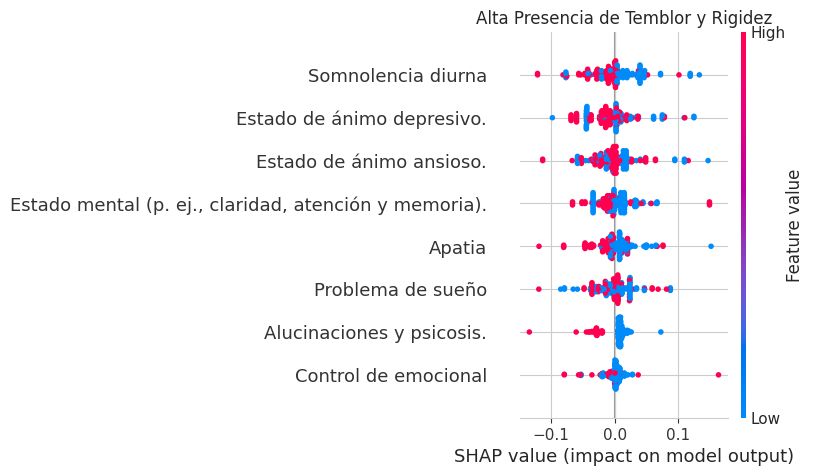

In [ ]:
shap.summary_plot(shap_values[:,:,3], X_train, show=False)
plt.title(clusters_nombres[3])
plt.show()

### Resumen del Gráfico de SHAP para cada Cluster

#### Cluster: Síntomas Motores Leves
- **Somnolencia diurna**: Valores altos incrementan significativamente la probabilidad de pertenencia.
- **Estado de ánimo depresivo**: También muestra un impacto significativo con valores altos.
- **Problema de sueño**: Tiene un impacto considerable con valores altos que aumentan la probabilidad.
- **Estado mental (claridad, atención y memoria)**: Afecta la pertenencia, con valores altos aumentando la probabilidad.

#### Cluster: Síntomas Motores Mínimos
- **Somnolencia diurna**: Valores altos aumentan la probabilidad de pertenencia.
- **Problema de sueño**: Tiene un impacto considerable, con valores altos que aumentan la probabilidad.
- **Estado mental (claridad, atención y memoria)**: Valores altos incrementan la probabilidad de pertenencia.

#### Cluster: Alta Presencia de Temblor y Rigidez
- **Somnolencia diurna**: Valores altos incrementan la probabilidad de pertenencia.
- **Estado de ánimo depresivo**: Impacto significativo, con valores altos.
- **Estado de ánimo ansioso**: Valores altos también afectan significativamente.
- **Estado mental (claridad, atención y memoria)**: Valores altos incrementan la probabilidad de pertenencia.

#### Cluster: Alta Presencia de Síntomas Motores
- **Estado de ánimo depresivo**: Valores altos aumentan la probabilidad de pertenencia.
- **Somnolencia diurna**: Tiene un impacto significativo con valores altos.
- **Alucinaciones y psicosis**: Valores altos incrementan la probabilidad.
- **Problema de sueño**: Valores altos aumentan la probabilidad de pertenencia.
- **Estado mental (claridad, atención y memoria)**: Impacto significativo con valores altos.